In [8]:
#%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib inline 
from __future__ import division
import os, numpy as np
import matplotlib
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)
import corner
# I changed plotting.py - change to numpy
# om10 changed
import om10
from om10 import plotting

from astropy.table import Table

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Paint the colors

db = om10.DB(catalog='/Users/Jenny/Desktop/om10fork/om10/data/qso_mock.fits')
print db.sample
db.select_random(Nlens=200,maglim=25,IQ=0.9)
print db.sample

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
--------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
    14428        0    2 0.062 264.2409 ...     0.0 35956.6 0.0  0.0    0.0
    21703        0    2 0.072 165.1962 ...     0.0  8193.9 0.0  0.0    0.0
    31711        0    2 0.082 155.9553 ...     0.0 35956.6 0.0  0.0    0.0
    34331        0    2 0.084 172.5838 ...     0.0 14498.4 0.0  0.0    0.0
    51810        0    2 0.096 244.9063 ...     0.0 26239.2 0.0  0.0    0.0
    83414        0    2 0.114   154.17 ...     0.0 11904.1 0.0  0.0    0.0
   115074        0    2 0.128 113.5011 ...     0.0 7101.16 0.0  0.0    0.0
   125027        0    2  0.13 247.1724 ...     0.0 16302.5 0.0  0.0    0.0
   147709        0    2 0.138 200.9093 ...     0.0 17748.4 0.0  0.0    0.0
   180815        0    2 0.148 185.3532 ...     0.0 14029.4 0.0  0.0    0.0
      ...      ...  ...   ...      ... ...     ...     ... ...  ...    ...
113167635        0    2 1

In [10]:
db.paint(synthetic=True, target='lens')
# put color index column in paint

In [11]:
# Initialize everything to make a cornerplot
# Rather than changing db.py to enable reading text files I just did in Jupyter

axis_labels = {}
axis_labels['ZLENS'] = '$z_d$'
axis_labels['MAGI'] = '$i_3$'
axis_labels['GR'] = '$G-R$'
axis_labels['RI'] = '$R-I$'
axis_labels['IZ'] = '$I-Z$'

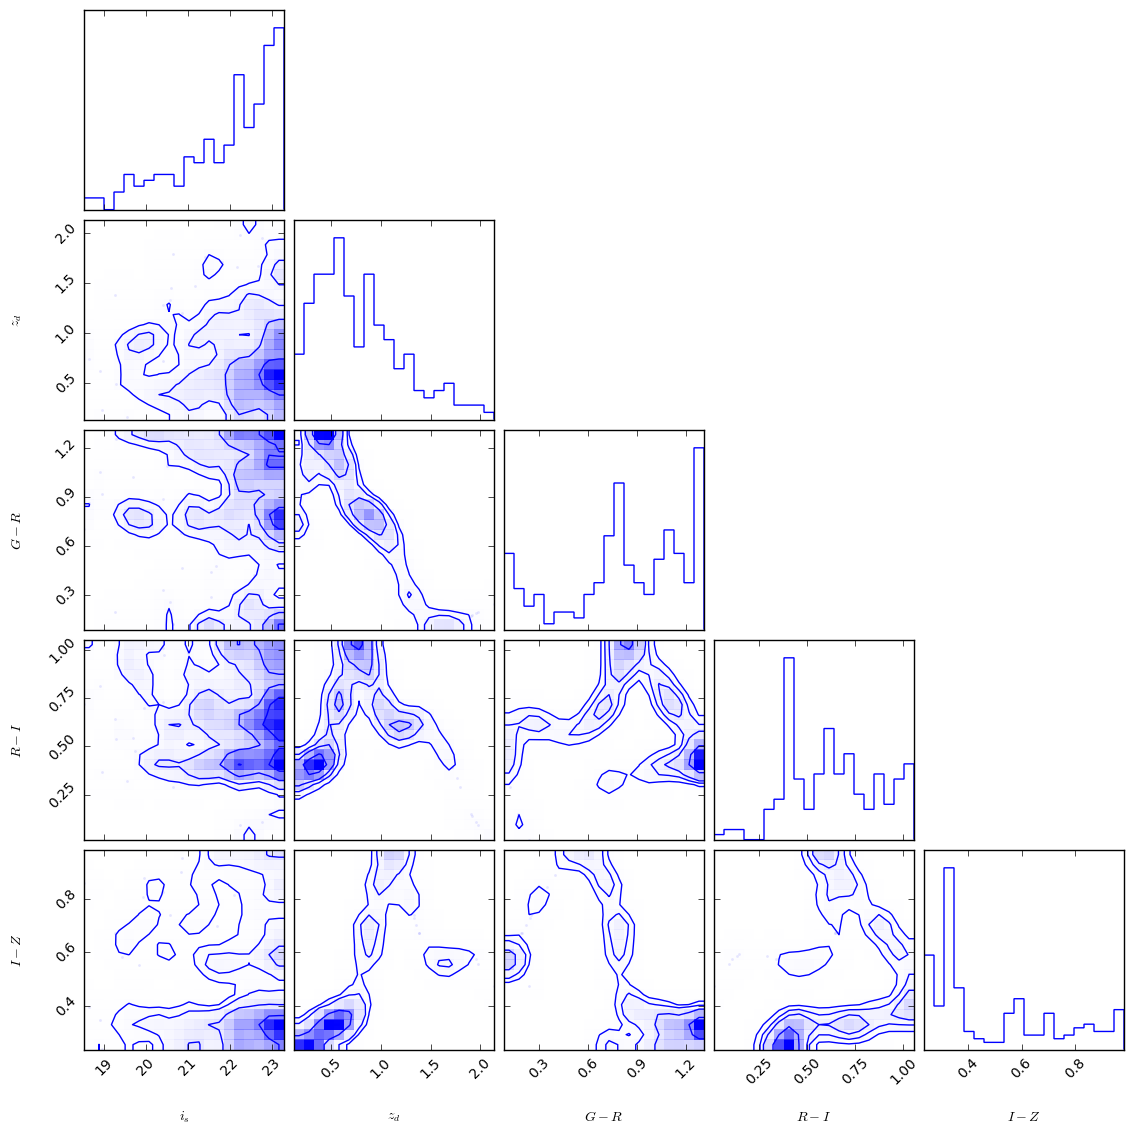

In [12]:
# Draw the cornerplot for the lenses that I painted

# I always had an error related to LaTeX, but this line fixes it
matplotlib.rc('text', usetex=False)

fig = om10.plot_sample(db.sample, color='blue', parameters=('MAGI','ZLENS', 'GR', 'RI', 'IZ'))

In [13]:
# Initialize everything to make a cornerplot
# Rather than changing db.py to enable reading text files I just did in Jupyter

axis_labels = {}
axis_labels['ZLENS'] = '$z_d$'
axis_labels['MAGI'] = '$i_3$'
axis_labels['GR'] = '$G-R$'
axis_labels['RI'] = '$R-I$'
axis_labels['IZ'] = '$I-Z$'

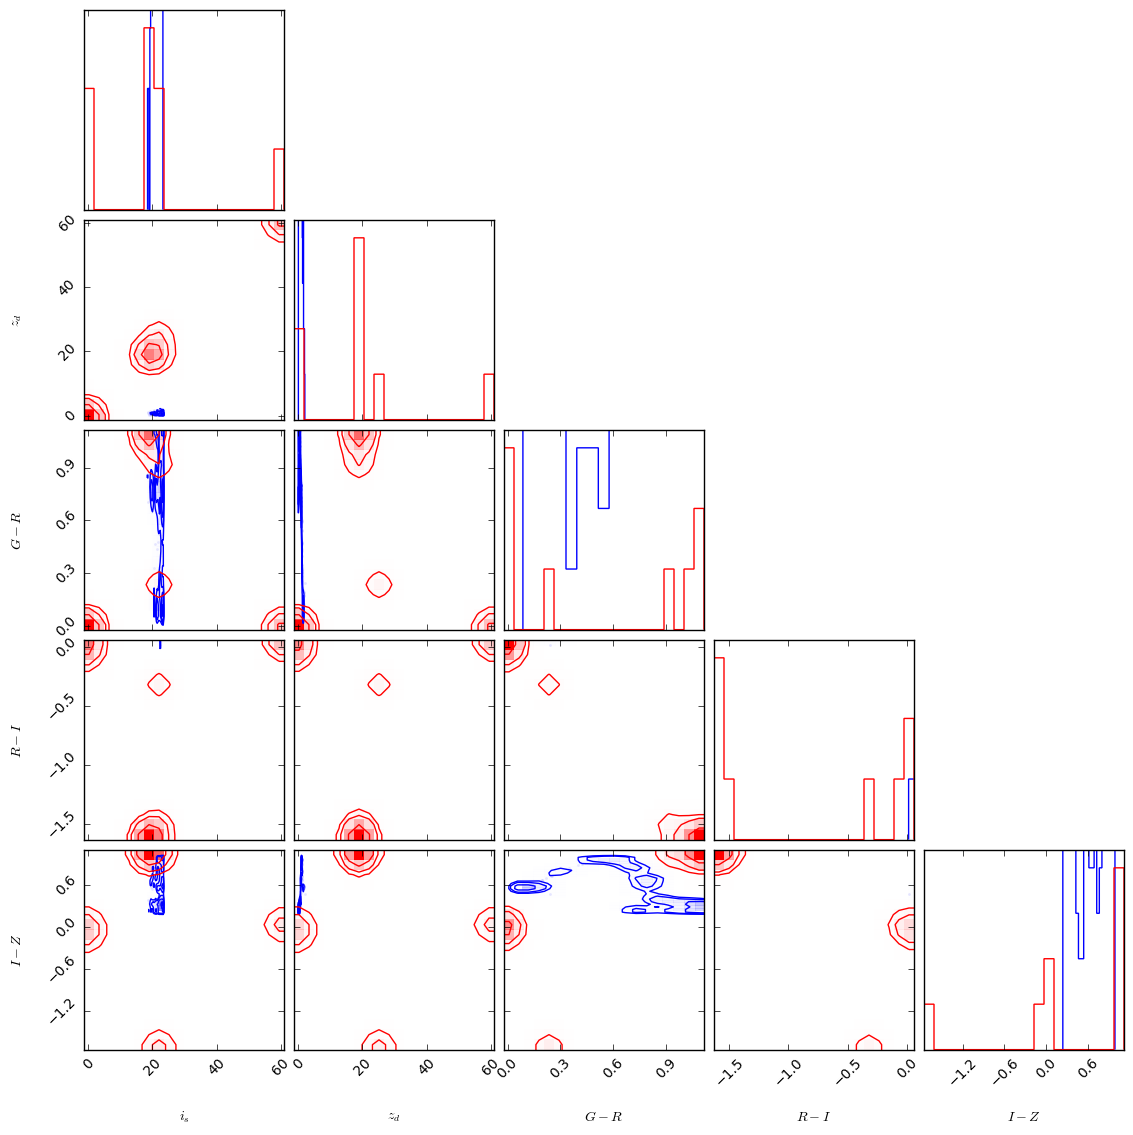

In [14]:
# load the "real" values and overlap it with the previous one
# ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z
table = np.loadtxt('../data/SDSS_LRGs.txt')

z = table[2]
i = table[7]
gr = table[5]-table[6]
ri = table[6]-table[7]
iz = table[7]-table[8]

data = Table({'MAGI': i, 'ZLENS': z, 'GR': gr, 'RI': ri, 'IZ': iz}, names=['MAGI', 'ZLENS', 'GR', 'RI', 'IZ'])
features, labels = plotting.extract_features(data, ('MAGI','ZLENS', 'GR', 'RI', 'IZ'))
corner.corner(features, labels=labels, color='red', smooth=1.0, fig=fig)